In [63]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from functools import reduce

In [64]:
readers = pd.read_csv('reader.csv')
readers['full_name'] = readers['name'] + ' ' + readers['last_name']
readers

name    last_name  reg_num            full_name
0       Violet      Stracke       11       Violet Stracke
1       Rogers         Will       12          Rogers Will
2        Uriah      McClure       13        Uriah McClure
3  Maximillian       Herzog       14   Maximillian Herzog
4      Clemmie        Stehr       15        Clemmie Stehr
5        Lonie     McKenzie       16       Lonie McKenzie
6      Brennan  Satterfield       17  Brennan Satterfield
7       Collin        Bosco       18         Collin Bosco
8       Marlen     Schiller       19      Marlen Schiller

In [65]:
order1 = pd.read_csv('order1.csv')
order2 = pd.read_csv('order2.csv')
frames = [order1, order2]
orders = pd.concat(frames, ignore_index=True).sort_values(by=['reg_num', 'order_date', 'order_book_name']).reset_index(drop=True)
orders

order_date  reg_num order_book_author order_book_name
0   2020-11-02       11   Augustus Ernser        Sausages
1   2020-12-08       11     Edwin Roberts       Interface
2   2020-10-10       12  Iliana Kertzmann            Bike
3   2020-11-05       12     Edwin Roberts       Interface
4   2020-11-09       12     Jammie Sporer           Salad
5   2020-11-09       13   Augustus Ernser        Sausages
6   2020-11-23       13       Jane Feeney         Systems
7   2020-12-29       13   Augustus Ernser      Background
8   2020-12-03       14     Jammie Sporer           Salad
9   2020-12-23       14   Kaylin Homenick         Harness
10  2020-12-08       15   Kaylin Homenick         Harness
11  2020-12-18       15   Augustus Ernser        Sausages
12  2020-10-10       16       Jane Feeney         Systems
13  2020-12-10       16   Augustus Ernser      Background
14  2020-12-10       16   Augustus Ernser        Sausages
15  2020-12-23       16       Jane Feeney         Systems
16  2020-12-25       16      Nadia Erdman            Scsi
17  2020-12-29       16       Jane Feeney         Systems
18  2020-11-09       17     Edwin Roberts       Interface
19  2020-12-23       17  Iliana Kertzmann            Bike
20  2020-11-23       18   Kaylin Homenick         Harness
21  2020-12-24       18      Nadia Erdman            Scsi
22  2020-12-29       19       Jane Feeney         Systems

## Task 1
1. Для кожного читача ( за iменем i прiзвищем) повний перелiк (безповторень) авторiв замовлених книг iз вказанням їх кiлькостi ( з усiх його замовленнь);
1а. прiзвище читача вибирати з випадаючого списку;
1б. побудувати дiаграму популярностi авторiв.

In [66]:
def plot(x, y, x_label, y_label, title):
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(x, y, color='#137477', width=0.6,)
    ax.set_ylabel(y_label, color='#eee5df', position=(1e6, 0.), horizontalalignment='left', size=15,fontweight='bold')
    ax.set_xlabel(x_label, color='#eee5df', horizontalalignment='left', position=(0., 1e6), size=15,fontweight='bold')
    ax.set_title(title, color='#eee5df', size=30,fontweight='bold', pad=30)
    ax.patch.set_facecolor('#f3bdac')
    fig.patch.set_facecolor('#252323')
    fig.patch.set_edgecolor('#252323')
    ax.tick_params(axis='x', rotation=70,)
    plt.show()

In [67]:
def f(full_name, r_plot=False, authors=False):
    print(full_name)
    print()
    reader_id = readers['reg_num'][readers['full_name'] == full_name].item()

    # reader author book count
    author_books = orders[orders['reg_num'] == reader_id].groupby('order_book_author', as_index=False).count().sort_values(by=['order_book_name'], ascending=False)

    print(author_books[['order_book_author', 'order_book_name']].to_string(index=False))
    
    # all authors rating
    rating_authors = orders.groupby('order_book_author', as_index=False).count().sort_values(by=['order_book_name'], ascending=False)
    
    # plots
    if r_plot:
        ix = list(author_books['order_book_author'])
        iy = list(author_books['order_book_name'])
        plot(ix, iy, 'Author', 'Count', full_name)
    if authors:
        rax = list(rating_authors['order_book_author'])
        ray = list(rating_authors['reg_num'])
        plot(rax, ray, 'Author', 'Count', 'All authors rating')

interact(f, full_name=list(readers['full_name']));

interactive(children=(Dropdown(description='full_name', options=('Violet Stracke', 'Rogers Will', 'Uriah McClu…

## Task 2
2. Рейтинг читачiв за загальною кiлькiстю замовлених книг за схемою:прiзвище та iм’я читача i загальна кiлькiсть книг у всiх його замовленнях;

In [68]:
rating = orders.groupby('reg_num', as_index=False).size().sort_values(by=['size'], ascending=False).reset_index(drop=True)
ratings = pd.merge(rating, readers[['reg_num','full_name']], on='reg_num')
ratings.rename(columns={'size':'orders'}, inplace=True)
ratings[['full_name', 'orders']].style.hide_index()

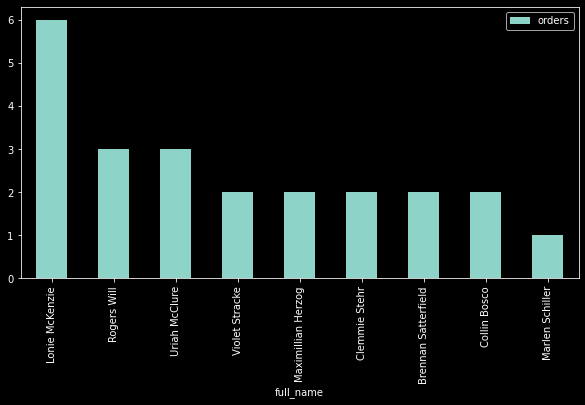

In [76]:
ratings.plot(x='full_name', y='orders', kind='bar', figsize=(10,5));

In [75]:
def g(date_start, date_end):
    print(date_start)
    print(date_end)

interact(g, date_start=sorted(list(set(orders['order_date']))), date_end=sorted(list(set(orders['order_date'])), reverse=True));

interactive(children=(Dropdown(description='date_start', options=('2020-10-10', '2020-11-02', '2020-11-05', '2…

## Task 3

In [71]:
rating_books = orders.groupby('order_book_name', as_index=False).size().sort_values(by=['size'], ascending=False).reset_index(drop=True)
rating_books.rename(columns={'size':'orders'}, inplace=True)
rating_books[['order_book_name', 'orders']].style.hide_index()

In [72]:
def t(book_name):
    print(rating_books[['order_book_name', 'orders']][rating_books['order_book_name'] == book_name].to_string(index=False))

interact(t, book_name=sorted(list(rating_books['order_book_name'])));

interactive(children=(Dropdown(description='book_name', options=('Background', 'Bike', 'Harness', 'Interface',…

In [83]:
def y(sym=''):
    print('your input:', sym)
    print('books:')
    print(rating_books['order_book_name'].loc[rating_books['order_book_name'].str.contains(sym,case=False, regex=False)].to_string(index=False))

interact(y, sym='');

interactive(children=(Text(value='', description='sym'), Output()), _dom_classes=('widget-interact',))